In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:


df = pd.read_excel('/content/1730285881-Airbnb_Open_Data.xlsx')


In [ ]:
df.head()

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,193.0,10.0,9.0,2021-10-19,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,28.0,30.0,45.0,2022-05-21,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,124.0,3.0,0.0,NaT,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,74.0,30.0,270.0,2019-07-05,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,41.0,10.0,9.0,2018-11-19,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   id                              102599 non-null  int64         
 1   NAME                            102329 non-null  object        
 2   host id                         102599 non-null  int64         
 3   host_identity_verified          102310 non-null  object        
 4   host name                       102191 non-null  object        
 5   neighbourhood group             102570 non-null  object        
 6   neighbourhood                   102583 non-null  object        
 7   lat                             102591 non-null  float64       
 8   long                            102591 non-null  float64       
 9   country                         102067 non-null  object        
 10  country code                    102468 non-null  object 

In [ ]:
df.duplicated().value_counts()

,count
False,102058
True,541


In [ ]:
df[df['neighbourhood group']=='brookln']

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
13,1008516,"Lovely Room 1, Garden, Best Area, Legal rental",26802410424,verified,Darcy,brookln,South Slope,40.66829,-73.98779,United States,...,116.0,4.0,167.0,2019-06-24,1.34,4.0,3.0,47.0,NaN,NaN


In [ ]:
df = pd.read_excel('/content/1730285881-Airbnb_Open_Data.xlsx')


In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df['price'] = df['price'].astype(str).str.replace('$', '', regex=False)
df['service fee'] = df['service fee'].astype(str).str.replace('$', '', regex=False)


In [ ]:
df['price'] = df['price'].str.replace(',', '', regex=False)
df['service fee'] = df['service fee'].str.replace(',', '', regex=False)


In [ ]:
df.rename(columns={
    'price': 'price_$',
    'service fee': 'service_fee_$'
}, inplace=True)

In [ ]:
df.dropna(inplace=True)

In [ ]:
if 'neighbourhood group' in df.columns:
    df.loc[df['neighbourhood group'].str.lower() == 'brookin', 'neighbourhood group'] = 'Brooklyn'

In [ ]:
if 'availability_365' in df.columns:
    df = df[df['availability_365'] <= 500]


In [ ]:
df['price_$'] = df['price_$'].astype(float)
df['service_fee_$'] = df['service_fee_$'].astype(float)
df['id'] = df['id'].astype(str)
df['host id'] = df['host id'].astype(str)
df['last review'] = pd.to_datetime(df['last review'], errors='coerce')
df['Construction year'] = df['Construction year'].astype(int)

In [ ]:
print("Duplicate counts:")
print(df.duplicated().value_counts())


Duplicate counts:
False    1
Name: count, dtype: int64


In [ ]:
print("\nDataframe info after cleaning:")
print(df.info())
print("\nFirst 5 rows of cleaned data:")
print(df.head())


Dataframe info after cleaning:
<class 'pandas.core.frame.DataFrame'>
Index: 1 entries, 11114 to 11114
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              1 non-null      object        
 1   NAME                            1 non-null      object        
 2   host id                         1 non-null      object        
 3   host_identity_verified          1 non-null      object        
 4   host name                       1 non-null      object        
 5   neighbourhood group             1 non-null      object        
 6   neighbourhood                   1 non-null      object        
 7   lat                             1 non-null      float64       
 8   long                            1 non-null      float64       
 9   country                         1 non-null      object        
 10  country code                    1 non-null 

In [ ]:
df.describe()

,lat,long,instant_bookable,Construction year,price_$,service_fee_$,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365
count,1.00000,1.00000,1.0,1.0,1.0,1.0,1.0,1.0,1,1.00,1.0,1.0,1.0
mean,40.71764,-73.95689,1.0,2010.0,702.0,140.0,1.0,1.0,2016-01-03 00:00:00,0.02,1.0,1.0,191.0
min,40.71764,-73.95689,1.0,2010.0,702.0,140.0,1.0,1.0,2016-01-03 00:00:00,0.02,1.0,1.0,191.0
25%,40.71764,-73.95689,1.0,2010.0,702.0,140.0,1.0,1.0,2016-01-03 00:00:00,0.02,1.0,1.0,191.0
50%,40.71764,-73.95689,1.0,2010.0,702.0,140.0,1.0,1.0,2016-01-03 00:00:00,0.02,1.0,1.0,191.0
75%,40.71764,-73.95689,1.0,2010.0,702.0,140.0,1.0,1.0,2016-01-03 00:00:00,0.02,1.0,1.0,191.0
max,40.71764,-73.95689,1.0,2010.0,702.0,140.0,1.0,1.0,2016-01-03 00:00:00,0.02,1.0,1.0,191.0
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
property_types = df['room type'].value_counts().to_frame()
property_types

,count
room type,
Private room,1


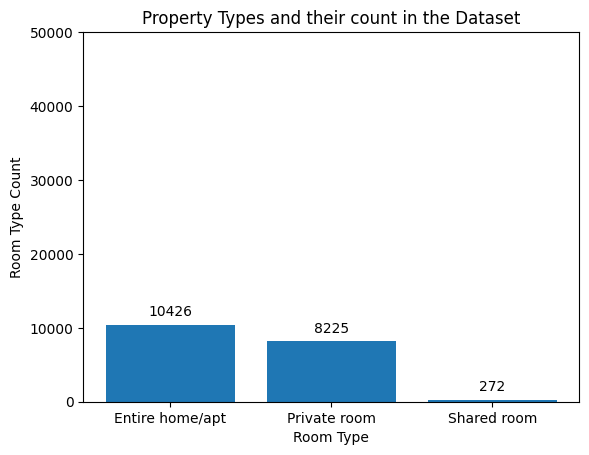

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


data = {'Room Type': ['Entire home/apt', 'Private room', 'Shared room'],
        'Count': [10426, 8225, 272]}
property_types = pd.DataFrame(data)


room_type_bar = plt.bar(property_types['Room Type'], property_types['Count'])


plt.bar_label(room_type_bar, padding=4)


plt.ylim([0, 50000])


plt.xlabel("Room Type")
plt.ylabel("Room Type Count")
plt.title("Property Types and their count in the Dataset")


plt.show()

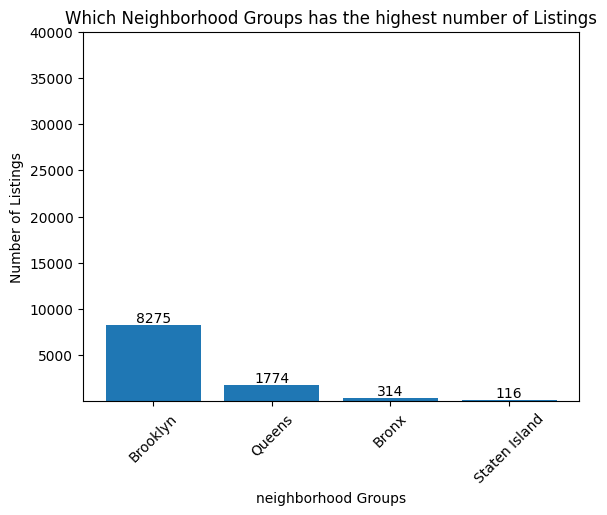

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


data = {
    'neighborhood Groups': ['Brooklyn', 'Queens', 'Bronx', 'Staten Island'],
    'count': [8275, 1774, 314, 116]
}


hood_group = pd.DataFrame(data).set_index('neighborhood Groups')


hood_group_bar = plt.bar(hood_group.index, hood_group.loc[:, "count"]);
plt.bar_label(hood_group_bar, labels=hood_group.loc[:,"count"], padding=0);
plt.ylim(10,40000);
plt.xlabel('neighborhood Groups');
plt.ylabel('Number of Listings');
plt.xticks(rotation=45);
plt.title('Which Neighborhood Groups has the highest number of Listings');
plt.show()


✅ Successfully loaded the Excel file.

📊 DataFrame Columns:
- id
- name
- host_id
- host_identity_verified
- host_name
- neighbourhood_group
- neighbourhood
- lat
- long
- country
- country_code
- instant_bookable
- cancellation_policy
- room_type
- construction_year
- price
- service_fee
- minimum_nights
- number_of_reviews
- last_review
- reviews_per_month
- review_rate_number
- calculated_host_listings_count
- availability_365
- house_rules
- license


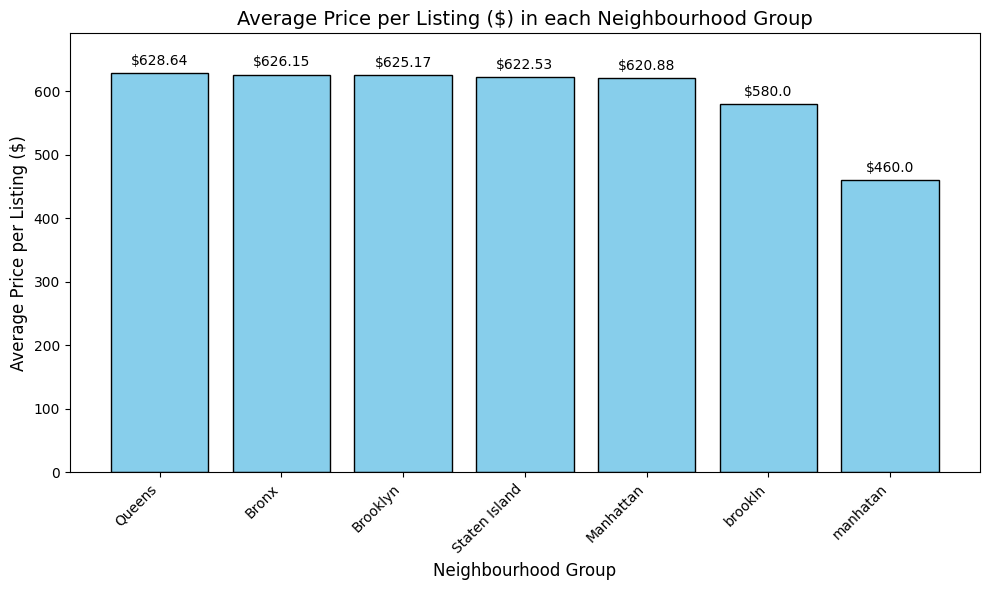

In [ ]:
# 🧠 Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import sys

# 1️⃣ Load your dataset (update path if needed)
try:
    df = pd.read_excel('/content/1730285881-Airbnb_Open_Data.xlsx', engine='openpyxl')
    print("✅ Successfully loaded the Excel file.")
except FileNotFoundError:
    print("❌ Error: The specified file was not found. Please check the file path.")
    sys.exit()
except Exception as e:
    print(f"⚠️ An error occurred while loading the file: {e}")
    sys.exit()

# 2️⃣ Standardize column names for consistency
df.columns = df.columns.str.lower().str.strip().str.replace(' ', '_')

# 3️⃣ Confirm the actual column names
print("\n📊 DataFrame Columns:")
for col in df.columns:
    print(f"- {col}")

# 4️⃣ Define column names after standardization
NEIGHBOURHOOD_GROUP_COL = 'neighbourhood_group'
PRICE_COL = 'price'

# 5️⃣ Ensure both columns exist
if NEIGHBOURHOOD_GROUP_COL not in df.columns or PRICE_COL not in df.columns:
    print(f"\n❌ Error: Columns '{NEIGHBOURHOOD_GROUP_COL}' or '{PRICE_COL}' not found.")
    print("🔍 Please check the column names printed above and adjust accordingly.")
    sys.exit()

# 6️⃣ Clean 'price' column — remove symbols and convert to numeric
df[PRICE_COL] = (
    df[PRICE_COL]
    .astype(str)
    .str.replace('$', '', regex=False)
    .str.replace(',', '', regex=False)
)
df[PRICE_COL] = pd.to_numeric(df[PRICE_COL], errors='coerce').fillna(0)

# 7️⃣ Calculate average price per neighbourhood group
avg_price_df = (
    df.groupby(NEIGHBOURHOOD_GROUP_COL)[PRICE_COL]
    .mean()
    .sort_values(ascending=False)
    .to_frame()
)

if avg_price_df.empty:
    print("\n⚠️ Warning: The average price DataFrame is empty. Check your data.")
    sys.exit()

# 8️⃣ Plot the average price as a bar chart
plt.figure(figsize=(10, 6))
avg_price_bar = plt.bar(
    avg_price_df.index,
    avg_price_df[PRICE_COL],
    color='skyblue',
    edgecolor='black'
)

plt.xlabel("Neighbourhood Group", fontsize=12)
plt.ylabel("Average Price per Listing ($)", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.title("Average Price per Listing ($) in each Neighbourhood Group", fontsize=14)

# Add bar labels (rounded to 2 decimals)
plt.bar_label(
    avg_price_bar,
    labels=[f"${round(x, 2)}" for x in avg_price_df[PRICE_COL]],
    label_type='edge',
    padding=4
)

plt.tight_layout()
plt.ylim([0, avg_price_df[PRICE_COL].max() * 1.1])
plt.show()


✅ Successfully loaded Airbnb dataset.
📌 Using columns → Construction Year: 'construction_year', Price: 'price'


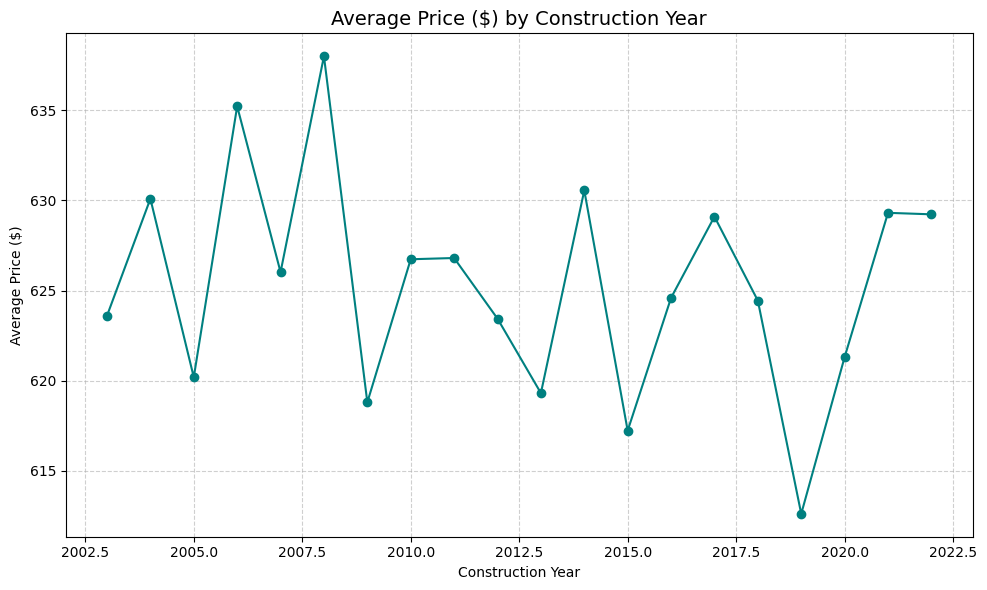

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import sys

# 🧩 Load the dataset (update path if needed)
try:
    df = pd.read_excel('/content/1730285881-Airbnb_Open_Data.xlsx', engine='openpyxl')
    print("✅ Successfully loaded Airbnb dataset.")
except FileNotFoundError:
    print("❌ Error: File not found. Please check the file path.")
    sys.exit()
except Exception as e:
    print(f"⚠️ Error while loading file: {e}")
    sys.exit()

# 🧠 Standardize column names for safety
df.columns = df.columns.str.lower().str.strip().str.replace(' ', '_')

# ✅ Detect possible column matches
construction_col = None
for col in df.columns:
    if "construction" in col or "year" in col:
        construction_col = col
        break

price_col = None
for col in df.columns:
    if "price" in col:
        price_col = col
        break

# ⚠️ Stop if columns are missing
if not construction_col or not price_col:
    print(f"❌ Required columns not found. Detected columns: {df.columns.tolist()}")
    sys.exit()

print(f"📌 Using columns → Construction Year: '{construction_col}', Price: '{price_col}'")

# 💵 Clean price column (remove $ and commas)
df[price_col] = df[price_col].astype(str).str.replace('$', '', regex=False).str.replace(',', '', regex=False)
df[price_col] = pd.to_numeric(df[price_col], errors='coerce')

# 🧮 Group by construction year and calculate average price
avg_price_by_year = df.groupby(construction_col)[price_col].mean().sort_index()

# 🧱 Plot the result
plt.figure(figsize=(10,6))
avg_price_by_year.plot(kind='line', marker='o', color='teal')

plt.xlabel('Construction Year')
plt.ylabel('Average Price ($)')
plt.title('Average Price ($) by Construction Year', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


✅ Successfully loaded Airbnb dataset.
📌 Top 10 Hosts by Calculated Host Listings Count:
                   calculated_host_listings_count
host_name                                        
Sonder (NYC)                             155848.0
Blueground                                76484.0
Karen                                     43301.0
Jeniffer                                  32840.0
Kara                                      27175.0
Sonder                                    20832.0
Kaz                                       18679.0
Ken                                       17668.0
Corporate Housing                         16926.0
Jeremy & Laura                            15264.0


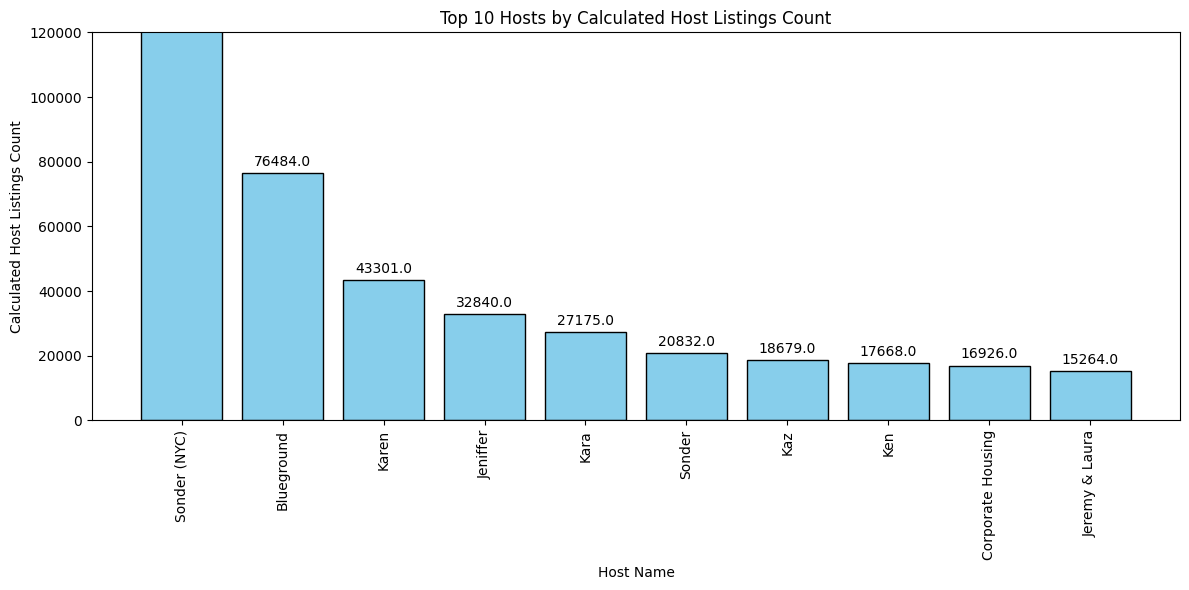

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import sys

# 🧩 Load dataset
try:
    df = pd.read_excel('/content/1730285881-Airbnb_Open_Data.xlsx', engine='openpyxl')
    print("✅ Successfully loaded Airbnb dataset.")
except FileNotFoundError:
    print("❌ Error: File not found. Please check the file path.")
    sys.exit()
except Exception as e:
    print(f"⚠️ Error while loading file: {e}")
    sys.exit()

# 🧠 Standardize column names
df.columns = df.columns.str.lower().str.strip().str.replace(" ", "_")

# ✅ Check required columns
if "host_name" not in df.columns or "calculated_host_listings_count" not in df.columns:
    print(f"❌ Required columns not found. Available: {df.columns.tolist()}")
    sys.exit()

# 🧮 Group by host name → sum listings → get top 10
hosts_df = (
    df.groupby("host_name")["calculated_host_listings_count"]
    .sum()
    .sort_values(ascending=False)
    .nlargest(10)
    .to_frame()
)

print("📌 Top 10 Hosts by Calculated Host Listings Count:")
print(hosts_df)

# 🎨 Plot bar chart
plt.figure(figsize=(12,6))
hosts_bar = plt.bar(hosts_df.index, hosts_df["calculated_host_listings_count"], color="skyblue", edgecolor="black")

# Add labels above bars, but clip if > 120000
labels = [min(val, 120000) for val in hosts_df["calculated_host_listings_count"]]
plt.bar_label(hosts_bar, labels=labels, label_type="edge", padding=3)

# Labels and title
plt.xlabel("Host Name")
plt.ylabel("Calculated Host Listings Count")
plt.title("Top 10 Hosts by Calculated Host Listings Count")

# Rotate x-axis labels for readability
plt.xticks(rotation=90)

# ✅ Set y-axis limit to 120,000
plt.ylim(0, 120000)

plt.tight_layout()
plt.show()


In [5]:
print(df.columns.tolist())


['id', 'NAME', 'host id', 'host_identity_verified', 'host name', 'neighbourhood group', 'neighbourhood', 'lat', 'long', 'country', 'country code', 'instant_bookable', 'cancellation_policy', 'room type', 'Construction year', 'price', 'service fee', 'minimum nights', 'number of reviews', 'last review', 'reviews per month', 'review rate number', 'calculated host listings count', 'availability 365', 'house_rules', 'license']


In [6]:
import pandas as pd

# 🧩 Load dataset
df = pd.read_excel('/content/1730285881-Airbnb_Open_Data.xlsx', engine='openpyxl')

# 🔍 Print column names to confirm
print(df.columns.tolist())

# 📊 Group by verified identity and calculate mean review rating
review = (
    df.groupby('host_identity_verified')['review rate number']
    .mean()
    .sort_values(ascending=False)
    .to_frame(name='Average Review Rating')
)

print("\nAverage Review Rating by Host Identity Verification Status:\n")
print(review)


['id', 'NAME', 'host id', 'host_identity_verified', 'host name', 'neighbourhood group', 'neighbourhood', 'lat', 'long', 'country', 'country code', 'instant_bookable', 'cancellation_policy', 'room type', 'Construction year', 'price', 'service fee', 'minimum nights', 'number of reviews', 'last review', 'reviews per month', 'review rate number', 'calculated host listings count', 'availability 365', 'house_rules', 'license']

Average Review Rating by Host Identity Verification Status:

                        Average Review Rating
host_identity_verified                       
verified                             3.286684
unconfirmed                          3.271767


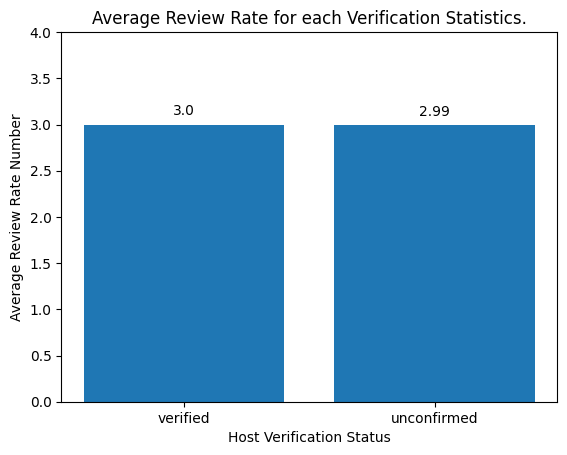

In [8]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'review' is a pandas DataFrame with 'review rate number' and 'Host Verification Status' columns.
# This part is a placeholder as the DataFrame is not provided.
# Example DataFrame:
data = {'Host Verification Status': ['verified', 'unconfirmed'], 'review rate number': [3.0, 2.99]}
review = pd.DataFrame(data)
review = review.set_index('Host Verification Status')

# The code from the user's request
review_bar = plt.bar(review.index, review.loc[:, "review rate number"])
plt.bar_label(review_bar, labels=round(review.loc[:, "review rate number"], 3), padding=5)
plt.ylim(0, 4)
plt.xlabel("Host Verification Status")
plt.ylabel("Average Review Rate Number")
plt.title("Average Review Rate for each Verification Statistics.")
plt.show()


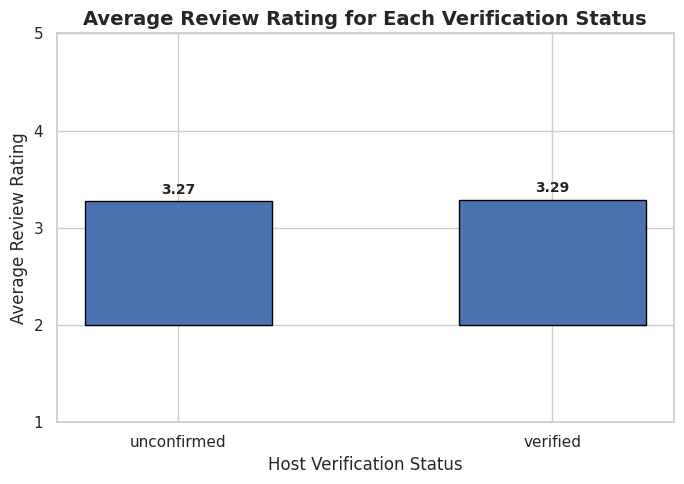

In [35]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 🧩 Load dataset
df = pd.read_excel('/content/1730285881-Airbnb_Open_Data.xlsx', engine='openpyxl')

# 🪄 Clean column names
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")

# ✅ Group by host identity verification & compute mean review rating
datadf = (
    df.groupby('host_identity_verified', as_index=False)['review_rate_number']
    .mean()
)

# 🎨 Seaborn style
sns.set_style("whitegrid")
base_color = sns.color_palette()[0]

# 📊 Offset the bars so they start from 2.0 instead of 0
offset = 2.0  # bar base height
datadf['adjusted_rate'] = datadf['review_rate_number'] - offset

# 🧱 Create the bar chart manually with bar base set at y=offset
plt.figure(figsize=(7, 5))
bars = plt.bar(
    datadf['host_identity_verified'],
    datadf['adjusted_rate'],
    bottom=offset,   # 👈 bars start at y=2.0
    color=base_color,
    width=0.5,
    edgecolor='black'
)

# 🏷️ Labels & title
plt.xlabel('Host Verification Status', fontsize=12)
plt.ylabel('Average Review Rating', fontsize=12)
plt.title("Average Review Rating for Each Verification Status", fontsize=14, fontweight='bold')

# 📏 Y-axis: show 1.0 to 5.0
plt.ylim(1.0, 5.0)
plt.yticks([1.0, 2.0, 3.0, 4.0, 5.0])

# 🧩 Add data labels at the top of bars
for i, row in datadf.iterrows():
    plt.text(i, row['review_rate_number'] + 0.05, f"{row['review_rate_number']:.2f}",
             ha='center', va='bottom', fontsize=10, fontweight='bold')

# ✨ Final touches
plt.tight_layout()
plt.show()


In [48]:
print(df.columns.tolist())


['id', 'name', 'host_id', 'host_identity_verified', 'host_name', 'neighbourhood_group', 'neighbourhood', 'lat', 'long', 'country', 'country_code', 'instant_bookable', 'cancellation_policy', 'room_type', 'construction_year', 'price', 'service_fee', 'minimum_nights', 'number_of_reviews', 'last_review', 'reviews_per_month', 'review_rate_number', 'calculated_host_listings_count', 'availability_365', 'house_rules', 'license']


In [49]:
# Strip spaces, lowercase, replace special characters
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_").str.replace("($)", "", regex=True)

print(df.columns.tolist())


['id', 'name', 'host_id', 'host_identity_verified', 'host_name', 'neighbourhood_group', 'neighbourhood', 'lat', 'long', 'country', 'country_code', 'instant_bookable', 'cancellation_policy', 'room_type', 'construction_year', 'price', 'service_fee', 'minimum_nights', 'number_of_reviews', 'last_review', 'reviews_per_month', 'review_rate_number', 'calculated_host_listings_count', 'availability_365', 'house_rules', 'license']


In [51]:
# Strip spaces, lowercase, replace special characters and parentheses
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_").str.replace("($)", "", regex=True)

print(df.columns.tolist())


['id', 'name', 'host_id', 'host_identity_verified', 'host_name', 'neighbourhood_group', 'neighbourhood', 'lat', 'long', 'country', 'country_code', 'instant_bookable', 'cancellation_policy', 'room_type', 'construction_year', 'price', 'service_fee', 'minimum_nights', 'number_of_reviews', 'last_review', 'reviews_per_month', 'review_rate_number', 'calculated_host_listings_count', 'availability_365', 'house_rules', 'license']


In [52]:
correlation = df['price'].corr(df['service_fee'])
print("Correlation between price and service fees:", correlation)


Correlation between price and service fees: 0.9999908755543349


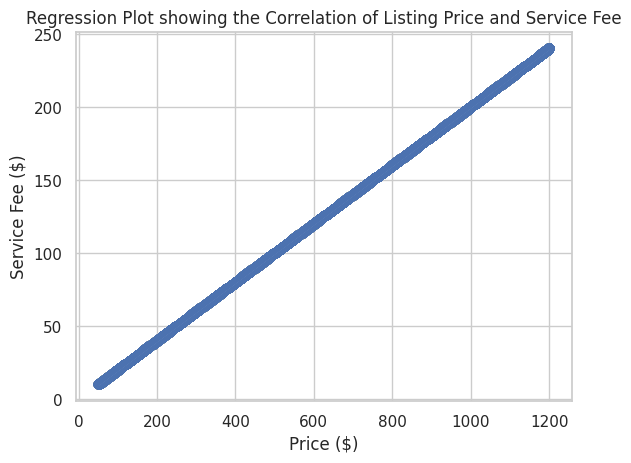

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.regplot(data=df, x='price', y='service_fee')

plt.xlabel('Price ($)')
plt.ylabel('Service Fee ($)')
plt.title("Regression Plot showing the Correlation of Listing Price and Service Fee")
plt.show()


In [54]:
import pandas as pd

# 🧩 Load your dataset
df = pd.read_excel('/content/1730285881-Airbnb_Open_Data.xlsx', engine='openpyxl')

# 🪄 Clean column names (remove spaces, lowercase)
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")

# ✅ Group by 'neighbourhood_group' and 'room_type', calculate mean review rating
review_summary = (
    df.groupby(['neighbourhood_group', 'room_type'])['review_rate_number']
    .mean()
    .to_frame(name='average_review_rate')  # Rename the column for clarity
    .reset_index()  # Optional: reset index to make it a flat DataFrame
)

# 🖨️ Display the result
print(review_summary)


   neighbourhood_group        room_type  average_review_rate
0                Bronx  Entire home/apt             3.346457
1                Bronx     Private room             3.329706
2                Bronx      Shared room             3.264957
3             Brooklyn  Entire home/apt             3.250378
4             Brooklyn       Hotel room             3.750000
5             Brooklyn     Private room             3.264465
6             Brooklyn      Shared room             3.336983
7            Manhattan  Entire home/apt             3.275807
8            Manhattan       Hotel room             3.500000
9            Manhattan     Private room             3.277576
10           Manhattan      Shared room             3.257459
11              Queens  Entire home/apt             3.349154
12              Queens       Hotel room             3.750000
13              Queens     Private room             3.315585
14              Queens      Shared room             3.377778
15       Staten Island  

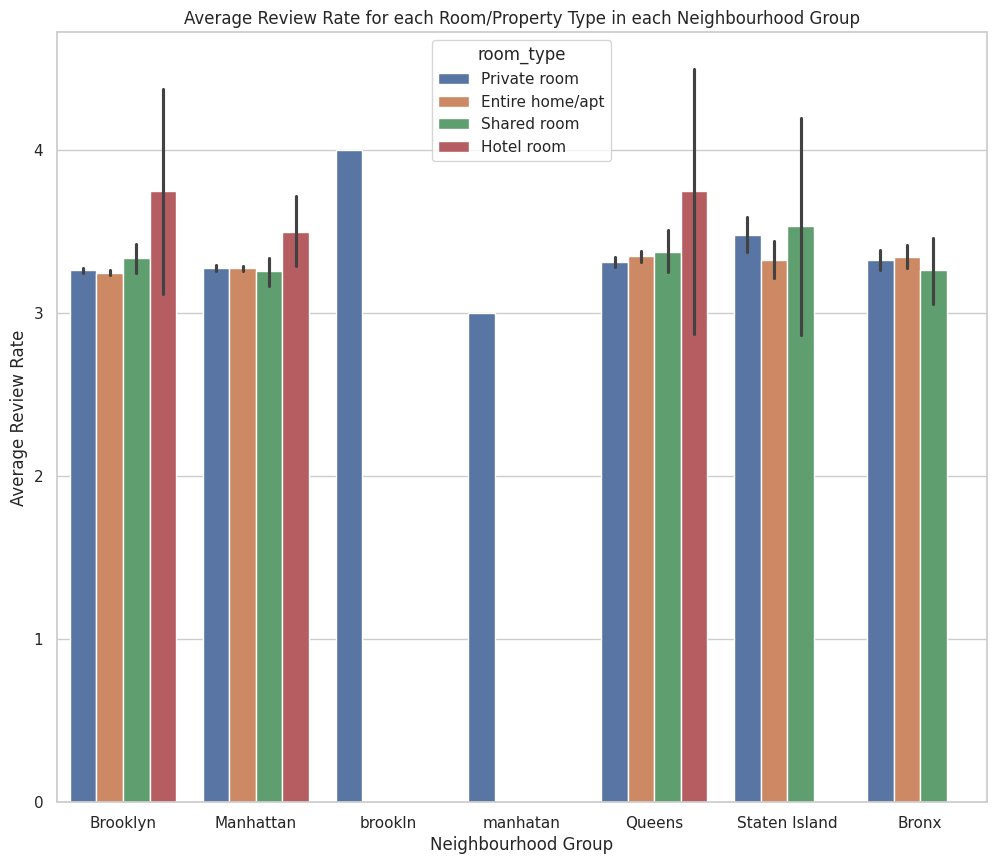

In [55]:
plt.figure(figsize=(12,10));
sns.barplot(data=df, x='neighbourhood_group', y='review_rate_number', hue='room_type');
plt.xlabel('Neighbourhood Group');
plt.ylabel('Average Review Rate');
plt.title("Average Review Rate for each Room/Property Type in each Neighbourhood Group");


In [59]:
# Strip spaces, lowercase, replace spaces with underscores
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")
print(df.columns.tolist())  # Check the cleaned column names


['id', 'name', 'host_id', 'host_identity_verified', 'host_name', 'neighbourhood_group', 'neighbourhood', 'lat', 'long', 'country', 'country_code', 'instant_bookable', 'cancellation_policy', 'room_type', 'construction_year', 'price', 'service_fee', 'minimum_nights', 'number_of_reviews', 'last_review', 'reviews_per_month', 'review_rate_number', 'calculated_host_listings_count', 'availability_365', 'house_rules', 'license']


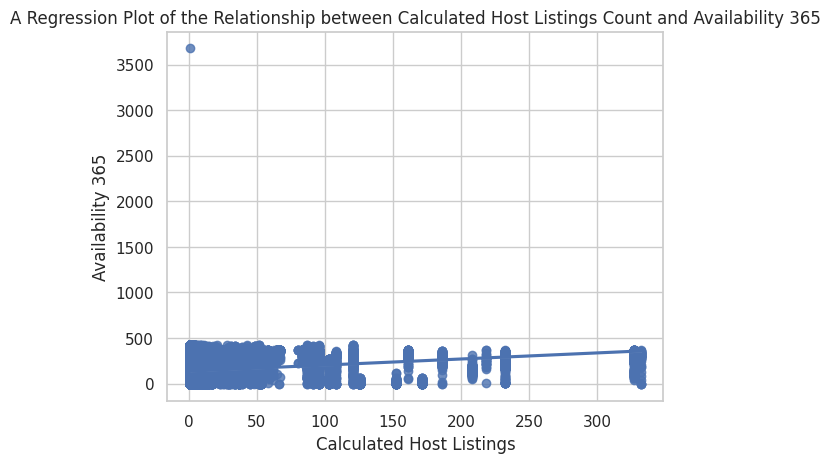

In [63]:
# Import necessary libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame
# Create the regression plot
sns.regplot(x='calculated_host_listings_count', y='availability_365', data=df)

# Add labels and a title to the plot for clarity
plt.xlabel('Calculated Host Listings')
plt.ylabel('Availability 365')
plt.title('A Regression Plot of the Relationship between Calculated Host Listings Count and Availability 365')

# Display the plot
plt.show()


In [65]:
# First, clean your column names
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")

# Check the column names to confirm
print(df.columns.tolist())

# Compute correlation using the cleaned column names
correlation = df['calculated_host_listings_count'].corr(df['availability_365'])
print("Correlation between host listings count and availability:", correlation)


['id', 'name', 'host_id', 'host_identity_verified', 'host_name', 'neighbourhood_group', 'neighbourhood', 'lat', 'long', 'country', 'country_code', 'instant_bookable', 'cancellation_policy', 'room_type', 'construction_year', 'price', 'service_fee', 'minimum_nights', 'number_of_reviews', 'last_review', 'reviews_per_month', 'review_rate_number', 'calculated_host_listings_count', 'availability_365', 'house_rules', 'license']
Correlation between host listings count and availability: 0.1591942422813064
